In [20]:
import pandas as pd
import numpy as np
import json
pd.set_option('display.max_columns', 500)

MARKET = "eth_cbbtc_usdc"
# MARKET = "eth_cbbtc_usdt"
MARKET = "base_cbbtc_usdc_full"


df = pd.read_csv(f"/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched/{MARKET}.csv")

with open("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/common/markets_meta.json", 'r') as f:
    all_markets_meta = json.load(f)
    market_address = df["market_address"].unique()[0]
    market_meta = all_markets_meta[market_address]
    collateral_asset_address = market_meta["collateral_asset_address"]
with open("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/common/assets_meta.json", 'r') as f:
    all_assets_meta = json.load(f)

market_meta.keys(), all_assets_meta.keys()

(dict_keys(['address', 'lltv', 'oracle_address', 'creation_datetime', 'network', 'loan_asset_address', 'loan_asset_symbol', 'loan_asset_decimals', 'collateral_asset_address', 'collateral_asset_symbol', 'collateral_asset_decimals', 'irm_curve']),
 dict_keys(['0xff531fB379E483e7820b0978De91E5112B2B7FE8', '0xfe72382695dC280e7392a0BE795128a126E9b7AE', '0xfaa57780efCAF4F6bC057B1aB1DB9e7eDf93841A', '0xfa9fbcF2e52037328F9376aD8FADbaC07B0E863D', '0xfa68FB4628DFF1028CFEc22b4162FCcd0d45efb6', '0xfE1B89A891E97A964291E43E89097e0Ddf90e266', '0xfE0ccc9942E98C963Fe6b4e5194EB6e3Baa4cb64', '0xfDFBAE5ccA1B308c5EFbc643B9AbC95e2DFa8E71', '0xfDF73F61146B9050FFe4b755364B9CAC670ea5b2', '0xfDD22Ce6D1F66bc0Ec89b20BF16CcB6670F55A5a', '0xfD953337376000F142dDa1aB4d6a2c32a2f15F7b', '0xfD739d4e423301CE9385c1fb8850539D657C296D', '0xfCeEB7586bab730fA400A5BF3FcF298d0DB4c7e7', '0xfCDecfe37463912C03A644128EB02A1147715E36', '0xfBF3C16676055776Ab9B286492D8f13e30e2E763', '0xfB9BD0Cde61c6aEDa32e8f4fA866dF87b2583d98', '0xfB6

In [40]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def density_scatter(df, x_col, y_col, figsize=(10, 8)):
    from scipy.stats import gaussian_kde
    
    x = df[x_col].values
    y = df[y_col].values
    
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    
    plt.figure(figsize=figsize)
    plt.scatter(x, y, c=z, s=30, edgecolor='black', linewidth=0.5, cmap='Spectral')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} - Density Colored')
    plt.colorbar(label='Density')
    plt.show()

def multi_df_scatter(df_list, x_col, y_col, alpha=0.7, labels=None, figsize=(12, 8)):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    
    if labels is None:
        labels = [f'DF_{i}' for i in range(len(df_list))]
    
    plt.figure(figsize=figsize)
    
    for i, (df, label, color) in enumerate(zip(df_list, labels, colors)):
        x = df[x_col].values
        y = df[y_col].values
        
        plt.scatter(x, y, alpha=alpha, s=30, edgecolor='black', 
                   linewidth=0.5, color=color, label=label)
    
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.title(f'{y_col} vs {x_col}', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()


def multi_df_density_scatter(df_list, x_col, y_col, labels=None, figsize=(12, 8)):
    from scipy.stats import gaussian_kde
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(df_list)))
    
    if labels is None:
        labels = [f'DF_{i}' for i in range(len(df_list))]
    
    plt.figure(figsize=figsize)
    
    for i, (df, label, color) in enumerate(zip(df_list, labels, colors)):
        x = df[x_col].values
        y = df[y_col].values
        
        if len(x) > 1:
            xy = np.vstack([x, y])
            z = gaussian_kde(xy)(xy)
            
            scatter = plt.scatter(x, y, c=z, s=30, alpha=0.7, 
                                 edgecolor='black', linewidth=0.5, 
                                 cmap='viridis', label=label)
        else:
            plt.scatter(x, y, s=30, alpha=0.7, color=color, 
                       edgecolor='black', linewidth=0.5, label=label)
    
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.title(f'{y_col} vs {x_col} - Density Comparison', fontsize=14)
    plt.legend()
    plt.colorbar(scatter, label='Density')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

import plotly.express as px
def multi_df_scatter_3d_plotly(df_list, x_col, y_col, z_col, labels=None):
    colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', 
              '#00FFFF', '#FF8000', '#8000FF', '#008000', '#800000']
    
    if labels is None:
        labels = [f'Cluster {i}' for i in range(len(df_list))]
    
    fig = go.Figure()  # Use go.Figure instead
    
    for i, (df, label) in enumerate(zip(df_list, labels)):
        fig.add_trace(go.Scatter3d(
            x=df[x_col],
            y=df[y_col],
            z=df[z_col],
            mode='markers',
            name=label,  # Unique name for each
            marker=dict(
                size=3,
                color=colors[i % len(colors)],
                opacity=0.7
            ),
            showlegend=True
        ))
    
    fig.update_layout(
        title=f'{z_col} vs {x_col} vs {y_col}',
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col
        )
    )
    fig.show()





In [22]:
pd.Series([x[1] for x in all_assets_meta[collateral_asset_address]["historical_price"]])

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
17483    87471.494725
17484    87489.878237
17485    87649.968053
17486    87603.079779
17487    87435.493935
Length: 17488, dtype: float64

In [23]:
df.columns

Index(['hash', 'type', 'timestamp', 'user_address', 'assets', 'assets_usd',
       'market', 'datetime', 'market_address', 'total_supply_before',
       'total_borrow_before', 'total_supply_after', 'total_borrow_after',
       'utilization_before', 'utilization_after', 'tx_actions',
       'borrow_rate_before', 'supply_rate_before', 'borrow_rate_after',
       'supply_rate_after', 'collateral_price', 'loan_asset_price',
       'collateral_before', 'collateral_value_before', 'debt_before',
       'ltv_before', 'collateral_after', 'collateral_value_after',
       'debt_after', 'ltv_after', 'health_factor_before',
       'health_factor_after', 'event_type', 'vault_flg', 'volatility_1h',
       'drawdown_1h', 'trend_1h', 'volatility_6h', 'drawdown_6h', 'trend_6h',
       'volatility_24h', 'drawdown_24h', 'trend_24h'],
      dtype='object')

In [24]:
df.head(5)
df.columns
# df[(df["type"] == 'MarketSupply') & (df["vault_flg"] == False)]["user_address"].nunique()
# df["vault_flg"].value_counts()
# df["type"].value_counts()

Index(['hash', 'type', 'timestamp', 'user_address', 'assets', 'assets_usd',
       'market', 'datetime', 'market_address', 'total_supply_before',
       'total_borrow_before', 'total_supply_after', 'total_borrow_after',
       'utilization_before', 'utilization_after', 'tx_actions',
       'borrow_rate_before', 'supply_rate_before', 'borrow_rate_after',
       'supply_rate_after', 'collateral_price', 'loan_asset_price',
       'collateral_before', 'collateral_value_before', 'debt_before',
       'ltv_before', 'collateral_after', 'collateral_value_after',
       'debt_after', 'ltv_after', 'health_factor_before',
       'health_factor_after', 'event_type', 'vault_flg', 'volatility_1h',
       'drawdown_1h', 'trend_1h', 'volatility_6h', 'drawdown_6h', 'trend_6h',
       'volatility_24h', 'drawdown_24h', 'trend_24h'],
      dtype='object')

In [25]:
def get_first_borrow_and_collateral(df):
    df_sorted = df.sort_values('timestamp')
    
    first_borrow = df_sorted[df_sorted['type'] == 'MarketBorrow'].drop_duplicates('user_address', keep='first')
    first_collateral = df_sorted[df_sorted['type'] == 'MarketSupplyCollateral'].drop_duplicates('user_address', keep='first')
    
    result = first_borrow[['user_address', 'timestamp', 'ltv_after', 'assets_usd', 
                          'utilization_after', 'health_factor_after', 'trend_24h', 'volatility_24h', 'datetime']].copy()
    
    collateral_info = first_collateral.set_index('user_address')[['timestamp', 'collateral_after', 'collateral_value_after']]
    result = result.join(collateral_info, on='user_address', rsuffix='_collateral')
    
    result['time_to_borrow_seconds'] = result['timestamp'] - result['timestamp_collateral']
    
    result = result.rename(columns={
        'timestamp': 'borrow_time',
        'timestamp_collateral': 'collateral_time',
        'ltv_after': 'ltv',
        'health_factor_after': 'health_factor',
        'collateral_after': 'collateral_amount',
        'collateral_value_after': 'collateral_volume',
        'assets_usd': 'borrow_volume',
        'utilization_after': 'utilization_at_borrow'
    })
    
    return result[['user_address', 'borrow_time', 'collateral_time', 'time_to_borrow_seconds',
                  'ltv', 'health_factor', 'collateral_amount', 'collateral_volume',
                  'borrow_volume', 'utilization_at_borrow', 'trend_24h', 'volatility_24h', 'datetime']].sort_values('user_address')
user_lending = get_first_borrow_and_collateral(df)
user_lending[user_lending["user_address"] == "0xdD84Ce1aDcb3A4908Db61A1dFA3353C3974c5a2B"]



,user_address,borrow_time,collateral_time,time_to_borrow_seconds,ltv,health_factor,collateral_amount,collateral_volume,borrow_volume,utilization_at_borrow,trend_24h,volatility_24h,datetime


In [26]:
df.head(2)

,hash,type,timestamp,user_address,assets,assets_usd,market,datetime,market_address,total_supply_before,total_borrow_before,total_supply_after,total_borrow_after,utilization_before,utilization_after,tx_actions,borrow_rate_before,supply_rate_before,borrow_rate_after,supply_rate_after,collateral_price,loan_asset_price,collateral_before,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,event_type,vault_flg,volatility_1h,drawdown_1h,trend_1h,volatility_6h,drawdown_6h,trend_6h,volatility_24h,drawdown_24h,trend_24h
0,0x4b95f45c3afdbdb97aca807ddc82d4d2b7cd2c09801b...,MarketSupply,1726217265,0xf8b9D83574574A345c32905a2A62D1d84650A0Ae,1000000,0.999931,base_cbbtc_usdc,2024-09-13 08:47:45,0x9103c3b4e834476c9a62ea009ba2c884ee42e94e6e31...,0.0,0.0,1.000000,0.0,0.0,0.000000,1,0.014892,0.0,0.014892,0.000000,58132.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,False,0,0,0,0.001659,-0.002464,-0.00422,0.003227,-0.002464,-0.000207
1,0xbc8e2030283aef18ec38474c5a6f62dbb20bc9d18688...,MarketSupply,1726217705,0xc1256Ae5FF1cf2719D4937adb3bbCCab2E00A2Ca,16478,0.016477,base_cbbtc_usdc,2024-09-13 08:55:05,0x9103c3b4e834476c9a62ea009ba2c884ee42e94e6e31...,1.0,0.0,1.016478,1.0,0.0,0.983789,3,0.014892,0.0,0.233453,0.229717,58132.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,True,0,0,0,0.001659,-0.002464,-0.00422,0.003227,-0.002464,-0.000207


In [27]:
from tqdm import tqdm
df["hash_short"] = df["hash"].str[:10]

def label_transaction_sequences(df, time_threshold_seconds=300):
    df = df.sort_values(['user_address', 'timestamp']).copy()
    df['event_sequence_type'] = df['event_type'].copy()
    inx = 0
    
    for i in tqdm(range(1, len(df))):
        # Check if same user
        if df.iloc[i]['user_address'] != df.iloc[i-1]['user_address']:
            inx = 0
            continue
        inx += 1
        addr = df.iloc[i]['user_address']
            
        # Check time difference
        time_diff = df.iloc[i]['timestamp'] - df.iloc[i-1]['timestamp']
        if time_diff > time_threshold_seconds:
            continue
        
        
        # Check for collateral + borrow sequence
        if (df.iloc[i-1]['event_type'] == 'collateral_add' and 
            df.iloc[i]['event_type'] == 'borrow_more' and inx > 1):
            df.at[df.index[i-1], 'event_sequence_type'] = 'borrow_more_w_collateral'
            df.at[df.index[i], 'event_sequence_type'] = 'borrow_more_w_collateral'
        if (df.iloc[i-1]['event_type'] == 'repay_full' and 
            df.iloc[i]['event_type'] == 'position_close'):
            df.at[df.index[i-1], 'event_sequence_type'] = 'position_close'
            df.at[df.index[i], 'event_sequence_type'] = 'position_close'
        if (df.iloc[i-1]['event_type'] == 'collateral_add' and 
            df.iloc[i]['event_type'] == 'borrow_more' and inx == 1):
            df.at[df.index[i-1], 'event_sequence_type'] = 'position_open'
            df.at[df.index[i], 'event_sequence_type'] = 'position_open'
    
    return df

df_labeled = label_transaction_sequences(df, 60*10)
df_labeled[df_labeled["user_address"] == "0x67bF5621658905174dB74d3385e0f02c1fda3022"][[
    'hash_short',
    'datetime',
    "event_type",
    "event_sequence_type",
    "type",
    "ltv_after",
    "debt_after",
]].sort_values("datetime")



  3%|▎         | 29639/1109999 [00:06<03:52, 4643.68it/s]


KeyboardInterrupt: 

In [ ]:
df_labeled["event_sequence_type"].value_counts()

event_sequence_type
loan_position_supply        25498
loan_position_withdraw      18995
borrow_more_w_collateral     2323
repay_partial                1959
borrow_more                  1508
position_open                1231
collateral_add                966
position_close                671
collateral_withdraw           403
repay_full                    119
liquidation                    50
other                          34
position_adjust                 4
Name: count, dtype: int64

In [28]:
# df_labeled.to_csv("./base_cbbtc_usdc_labeled.csv", index=False)
df_labeled = pd.read_csv("./base_cbbtc_usdc_labeled.csv")

In [29]:
df["event_type"].value_counts()

def create_event_chains(df, max_sequence_length=30):
    """
    Creates event chains for each user with financial metrics.
    """
    def compress_sequence(events):
        compressed = []
        count = 1
        
        for i, event in enumerate(events):
            if i == 0:
                compressed.append(event)
            elif event == compressed[-1]:
                count += 1
            else:
                if count > 1:
                    compressed[-1] = f"{compressed[-1]}({count})"
                compressed.append(event)
                count = 1
        
        if count > 1:
            compressed[-1] = f"{compressed[-1]}({count})"
        
        return compressed

    df_sorted = df.sort_values(['user_address', 'timestamp']).copy().drop_duplicates("hash")
    
    chains = []
    
    for user, user_df in df_sorted.groupby('user_address'):
        events = user_df['event_sequence_type'].tolist()
        timestamps = user_df['timestamp'].tolist()
        
        # Extract financial metrics arrays
        collateral_after = user_df['collateral_after'].values
        debt_after = user_df['debt_after'].values
        ltv_after = user_df['ltv_after'].values
        ltv_before = user_df['ltv_before'].values
        collateral_value_after = user_df['collateral_value_after'].values
        
        # Create compressed chain
        compressed_events = []
        compressed_timestamps = []
        compressed_indices = []
        
        last_event = None
        for idx, (event, ts) in enumerate(zip(events, timestamps)):
            if event != last_event:
                compressed_events.append(event)
                compressed_timestamps.append(ts)
                compressed_indices.append(idx)
                last_event = event
        
        # Process segments
        chain_parts = []
        current_timestamps = []
        current_indices = []
        chain_index = 0
        
        for i, (event, ts, idx) in enumerate(zip(compressed_events, compressed_timestamps, compressed_indices)):
            chain_parts.append(event)
            current_timestamps.append(ts)
            current_indices.append(idx)
            
            if event == "position_close" or i == (len(compressed_events) - 1):
                if not current_indices:
                    chain_parts = []
                    current_timestamps = []
                    current_indices = []
                    continue
                
                # Get financial data for this segment
                segment_indices = current_indices
                segment_collateral = collateral_after[segment_indices]
                segment_debt = debt_after[segment_indices]
                segment_ltv = ltv_after[segment_indices]
                segment_before_ltv = ltv_before[segment_indices]
                segment_collateral_value = collateral_value_after[segment_indices]
                
                # Calculate metrics
                initial_debt = segment_debt[0] if len(segment_debt) > 0 else 0
                max_debt = segment_debt.max() if len(segment_debt) > 0 else 0
                final_debt = segment_debt[-1] if len(segment_debt) > 0 else 0
                
                initial_collateral = segment_collateral[0] if len(segment_collateral) > 0 else 0
                max_collateral = segment_collateral.max() if len(segment_collateral) > 0 else 0
                final_collateral = segment_collateral[-1] if len(segment_collateral) > 0 else 0
                
                initial_collateral_value = segment_collateral_value[0] if len(segment_collateral_value) > 0 else 0
                max_collateral_value = segment_collateral_value.max() if len(segment_collateral_value) > 0 else 0
                
                initial_ltv = max(segment_ltv[0], segment_before_ltv[0]) if len(segment_ltv) > 0 else 0
                max_ltv = max(segment_ltv.max(), segment_before_ltv.max()) if len(segment_ltv) > 0 else 0
                final_ltv = max(segment_ltv[-1], segment_before_ltv[-1]) if len(segment_ltv) > 0 else 0
                
                # Chain string
                chain = " → ".join(chain_parts[:max_sequence_length])
                
                if chain_parts[0].startswith("loan"):
                    chain_parts = []
                    current_timestamps = []
                    current_indices = []
                    continue
                
                chains.append({
                    'user_address': user,
                    'chain_id': f"{user[:10]}_{chain_index}",
                    'event_chain': chain,
                    'chain_length': len(current_indices),
                    'position_length_days': (current_timestamps[-1] - current_timestamps[0]) / (24*3600),
                    'total_events': len(chain_parts),
                    
                    # Financial metrics
                    'initial_debt': initial_debt,
                    'max_debt': max_debt,
                    
                    'initial_collateral': initial_collateral,
                    'max_collateral': max_collateral,
                    'final_collateral': final_collateral,
                    
                    'initial_collateral_value': initial_collateral_value,
                    'max_collateral_value': max_collateral_value,
                    
                    'initial_ltv': initial_ltv,
                    'max_ltv': max_ltv,
                    'ltv_diff': max_ltv - initial_ltv,
                    
                    'avg_debt': segment_debt.mean() if len(segment_debt) > 0 else 0,
                    'avg_ltv': segment_ltv.mean() if len(segment_ltv) > 0 else 0,
                    'ltv_volatility': segment_ltv.std() if len(segment_ltv) > 1 else 0,
                    
                    # Timestamps
                    'first_timestamp': current_timestamps[0],
                    'last_timestamp': current_timestamps[-1],
                    'first_event': chain_parts[0],
                    'last_event': chain_parts[-1],
                    
                    # Risk metrics
                    'was_liquidated': 1 if 'liquidation' in chain.lower() else 0,
                })
                
                chain_index += 1
                chain_parts = []
                current_timestamps = []
                current_indices = []
    
    chains_df = pd.DataFrame(chains)
    return chains_df

chains_df = create_event_chains(df_labeled[df_labeled["vault_flg"] == False])
chains_df.head(3)

,user_address,chain_id,event_chain,chain_length,position_length_days,total_events,initial_debt,max_debt,initial_collateral,max_collateral,final_collateral,initial_collateral_value,max_collateral_value,initial_ltv,max_ltv,ltv_diff,avg_debt,avg_ltv,ltv_volatility,first_timestamp,last_timestamp,first_event,last_event,was_liquidated
0,0x0002f95Bc5D92B33e2f70EF99808c57637355484,0x0002f95B_0,position_open → borrow_more_w_collateral → rep...,57,186.558310,57,619.15,3996.103617,0.009020,0.057983,0.000000,858.228869,5447.850000,0.721428,0.805306,0.083878,2402.015730,0.663853,0.171294,1736336843,1752455481,position_open,position_close,0
1,0x00060993C927eE4A3738D916f877c9C92d6F81bD,0x00060993_0,position_open → repay_partial,2,17.853958,2,10000.00,10000.000000,0.167814,0.167814,0.167814,19977.243864,19977.243864,0.500570,0.549965,0.049395,9500.000000,0.497769,0.002801,1754966623,1756509205,position_open,repay_partial,0
2,0x000Aee61aee8aA46422A2f29Ebefc57684A9Ee81,0x000Aee61_0,position_open → collateral_withdraw → position...,3,213.666713,3,200.00,200.000000,0.004265,0.004265,0.000000,411.991508,411.991508,0.485447,0.644588,0.159141,130.886669,0.376678,0.274161,1732935901,1751396705,position_open,position_close,0


In [62]:
df_labeled["event_type"].value_counts().index

Index(['loan_position_supply', 'loan_position_withdraw', 'position_open',
       'borrow_more', 'repay_partial', 'borrow_more_w_collateral',
       'collateral_add', 'position_close', 'collateral_withdraw', 'repay_full',
       'other', 'position_adjust'],
      dtype='object', name='event_type')

In [30]:
def simplify_chain_risk_level(chain):
    if pd.isna(chain):
        return chain
    
    events = chain.split(' → ')
    simplified = []
    
    for event in events:
        # Keep these as-is
        if event in ['position_open', 'position_close', 'liquidation', 'borrow_more_w_collateral', ]:
            simplified.append(event)
        # Risk decreasing events
        elif event in ['repay_full', 'repay_partial', 'loan_position_withdraw', 
                      'collateral_withdraw']:
            simplified.append('position_risk_decrease')
        # Risk increasing events  
        elif event in ['borrow_more', 'collateral_add',
                      'loan_position_supply']:
            simplified.append('position_risk_increase')
        # Position adjustments
        elif event == 'position_adjust':
            simplified.append('position_adjust')
        else:
            simplified.append('other')
    
    # Remove consecutive duplicates
    final_events = []
    for event in simplified:
        if not final_events or event != final_events[-1]:
            final_events.append(event)
    
    return ' → '.join(final_events)

def add_simplified_chain_column(df):
    df = df.copy()
    df['event_chain_collapsed'] = df['event_chain'].apply(simplify_chain_risk_level)
    return df

chains_df = add_simplified_chain_column(chains_df)


In [31]:
chains_df[chains_df["first_timestamp"] > 1765314000]
df["datetime"].max()
chains_df.shape

(29217, 25)

In [32]:
import numpy as np

def leave_valid_chains(chains_df, prefix="", len_lim=10, leave_first_k=None, contains_event=None):
    df_prep = chains_df[chains_df["event_chain"].str.startswith(prefix) & (chains_df["total_events"] < len_lim)]
    if contains_event:
        df_prep = df_prep[df_prep["event_chain"].str.contains(contains_event)]
    if leave_first_k is not None:
        df_prep['event_chain'] = df_prep['event_chain'].str.split('→').str[:leave_first_k].str.join('→').str.strip()
    return df_prep

def print_chains_stats(chains_df, prefix, len_lim = 10, leave_first_k=None, contains_event=None, chains_col="event_chain"):
    valid_chains_cnt = chains_df[chains_df["total_events"] < len_lim].shape[0]
    df_prep = leave_valid_chains(chains_df, prefix, len_lim, leave_first_k, contains_event)
    
    for ch in df_prep[chains_col].value_counts().index:
        cnt = df_prep[df_prep[chains_col] == ch].shape[0]
        print(f"{cnt} ({np.round(cnt/valid_chains_cnt*100,1)}% of all), ({np.round(cnt/len(df_prep)*100,1)}% of prefix)   {ch}")

def print_chains_stats_raw(df_prep):    
    for ch in df_prep["event_chain"].value_counts().index:
        cnt = df_prep[df_prep["event_chain"] == ch].shape[0]
        print(f"{cnt} ({np.round(cnt/len(df_prep)*100,1)}% of prefix)   {ch}")


chains_df["event_chain"].value_counts()[:50]
chains_df[chains_df["event_chain"].str.startswith("position_open → borrow_more") & (chains_df["total_events"] < 10)]["event_chain"].value_counts()

print_chains_stats(
    chains_df,
    # "position_open → borrow_more_w_collateral",
    "position_open",
    40000,
    6,
    "position_close",
    "event_chain_collapsed"
)

# chains_df[chains_df["event_chain"].str.startswith("position_open → borrow_more") & (chains_df["total_events"] < 10)].shape, \
# chains_df[chains_df["event_chain"].str.startswith("position_open → borrow_more")].shape

5974 (20.4% of all), (44.9% of prefix)   position_open → position_close
2592 (8.9% of all), (19.5% of prefix)   position_open → position_risk_decrease → position_close
820 (2.8% of all), (6.2% of prefix)   position_open → position_risk_increase → position_close
808 (2.8% of all), (6.1% of prefix)   position_open → borrow_more_w_collateral → position_close
541 (1.9% of all), (4.1% of prefix)   position_open → borrow_more_w_collateral → position_risk_decrease → position_close
464 (1.6% of all), (3.5% of prefix)   position_open → position_risk_increase → position_risk_decrease → position_close
146 (0.5% of all), (1.1% of prefix)   position_open → borrow_more_w_collateral → position_risk_increase → position_close
128 (0.4% of all), (1.0% of prefix)   position_open → borrow_more_w_collateral → position_risk_increase → position_risk_decrease → position_close
120 (0.4% of all), (0.9% of prefix)   position_open → position_risk_decrease → position_risk_increase → position_close
107 (0.4% of all

In [35]:
chains_df["event_chain"].value_counts().index[:10]

Index(['position_open → position_close', 'position_open',
       'position_open → repay_partial → position_close',
       'position_open → repay_partial',
       'position_open → borrow_more_w_collateral',
       'position_open → borrow_more_w_collateral → position_close',
       'position_open → borrow_more',
       'position_open → borrow_more_w_collateral → repay_partial → position_close',
       'position_open → collateral_add → position_close',
       'position_open → borrow_more_w_collateral → borrow_more'],
      dtype='object', name='event_chain')

In [365]:
(chains_df[chains_df["event_chain"] == "position_open → position_close"]["position_length"] / (3600*24)).describe()
# chains_df.head(5)

count    5974.000000
mean       12.773321
std        25.724687
min         0.000162
25%         0.329074
50%         2.932500
75%        12.171597
max       300.689884
Name: position_length, dtype: float64

In [363]:
df["user_address"].nunique()
18460804 / 60 / 60 / 24

213.66671296296295

In [334]:
import plotly.graph_objects as go

def plot_sankey_chains(chains_df, prefix="", len_lim=15, top_n=20, leave_first_k=None):
    df_prep = chains_df[chains_df["event_chain"].str.startswith(prefix) & (chains_df["total_events"] < len_lim)]
    if leave_first_k is not None:
        df_prep['event_chain'] = df_prep['event_chain'].str.split('→').str[:leave_first_k].str.join('→').str.strip()

    all_chains = "→".join(df_prep['event_chain'].dropna()).split('→')
    unique_events = list(set(all_chains))
    
    # Create mapping for Sankey
    event_to_idx = {event: i for i, event in enumerate(unique_events)}
    
    # Count transitions
    source, target, value = [], [], []
    
    for chain in df_prep['event_chain'].dropna().head(top_n):
        events = chain.split('→')
        for i in range(len(events)-1):
            source.append(event_to_idx[events[i]])
            target.append(event_to_idx[events[i+1]])
            value.append(1)
    
    fig = go.Figure(data=[go.Sankey(
        node=dict(label=unique_events),
        link=dict(source=source, target=target, value=value)
    )])
    
    fig.update_layout(title="User Event Flow")
    fig.show()
plot_sankey_chains(
    chains_df,
    leave_first_k=4,
    prefix="position_open"

)

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3184/3467755120.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Analyze completed chains

In [36]:
short_chains = leave_valid_chains(
    chains_df,
    prefix="position_open",
    len_lim=5,
    leave_first_k=5,
    contains_event="position_close",
)
print_chains_stats_raw(short_chains)
open_close_chains = short_chains[short_chains["event_chain"] == "position_open → position_close"]
open_repay_close_chains = short_chains[short_chains["event_chain"] == "position_open → repay_partial → position_close"]
open_borrow_close_chains = short_chains[short_chains["event_chain"].isin([
    "position_open → repay_partial → position_close",
    "position_open → borrow_more_w_collateral → repay_partial → position_close",
])]
borrow_add_collateral_chains = short_chains[short_chains["event_chain"].isin([
    "position_open → collateral_add → position_close",
    "position_open → collateral_add → repay_partial → position_close",
])]

open_close_chains.shape, open_close_chains["user_address"].nunique()

5974 (52.6% of prefix)   position_open → position_close
2348 (20.7% of prefix)   position_open → repay_partial → position_close
808 (7.1% of prefix)   position_open → borrow_more_w_collateral → position_close
488 (4.3% of prefix)   position_open → borrow_more_w_collateral → repay_partial → position_close
434 (3.8% of prefix)   position_open → collateral_add → position_close
293 (2.6% of prefix)   position_open → borrow_more → position_close
172 (1.5% of prefix)   position_open → collateral_add → repay_partial → position_close
145 (1.3% of prefix)   position_open → borrow_more → repay_partial → position_close
99 (0.9% of prefix)   position_open → repay_full → position_close
73 (0.6% of prefix)   position_open → borrow_more_w_collateral → collateral_add → position_close
63 (0.6% of prefix)   position_open → collateral_add → borrow_more_w_collateral → position_close
56 (0.5% of prefix)   position_open → repay_partial → collateral_add → position_close
45 (0.4% of prefix)   position_open → 

((5974, 25), 4311)

In [386]:
open_close_chains.head(2)

,user_address,chain_id,event_chain,chain_length,position_length_days,total_events,initial_debt,max_debt,initial_collateral,max_collateral,final_collateral,initial_collateral_value,max_collateral_value,initial_ltv,max_ltv,avg_debt,avg_ltv,ltv_volatility,first_timestamp,last_timestamp,first_event,last_event,was_liquidated
5,0x001D862D3ED16aC91233A26fa537509348Da48E5,0x001D862D_0,position_open → position_close,2,38.527384,2,43.0,43.0,0.000505,0.000505,0.0,57.346222,57.346222,0.749831,0.749831,21.337301,0.374916,0.374916,1755658763,1758987529,position_open,position_close,0
9,0x002f200ab53b756f590D242D5a61766c227A825C,0x002f200a_0,position_open → position_close,2,1.646505,2,200.0,200.0,0.012238,0.012238,0.0,999.907424,999.907424,0.200019,0.200019,99.973945,0.100009,0.100009,1744259295,1744401553,position_open,position_close,0


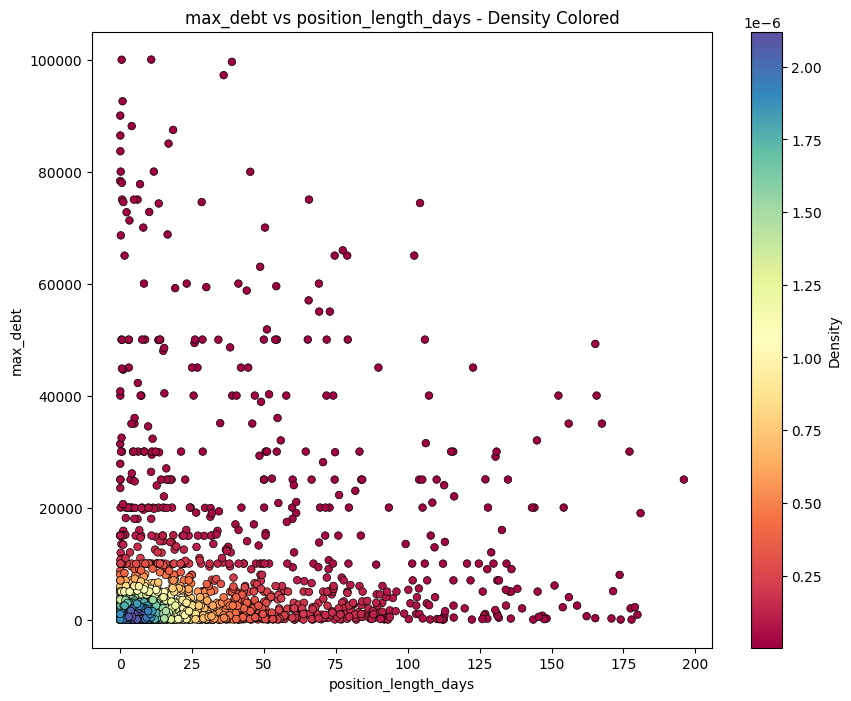

In [462]:
open_close_chains["max_debt"]

density_scatter(
    open_repay_close_chains[open_repay_close_chains["max_debt"] < 100_000],
    "position_length_days",
    "max_debt",
)

In [464]:
open_borrow_close_chains["ltv_diff"] = open_borrow_close_chains["max_ltv"] - open_borrow_close_chains["initial_ltv"]
open_close_chains["ltv_diff"] = open_close_chains["max_ltv"] - open_close_chains["initial_ltv"]
open_repay_close_chains["ltv_diff"] = open_repay_close_chains["max_ltv"] - open_repay_close_chains["initial_ltv"]
borrow_add_collateral_chains["ltv_diff"] = borrow_add_collateral_chains["max_ltv"] - borrow_add_collateral_chains["initial_ltv"]
short_chains["ltv_diff"] = short_chains["max_ltv"] - short_chains["initial_ltv"]

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3184/2718973599.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3184/2718973599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3184/2718973599.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

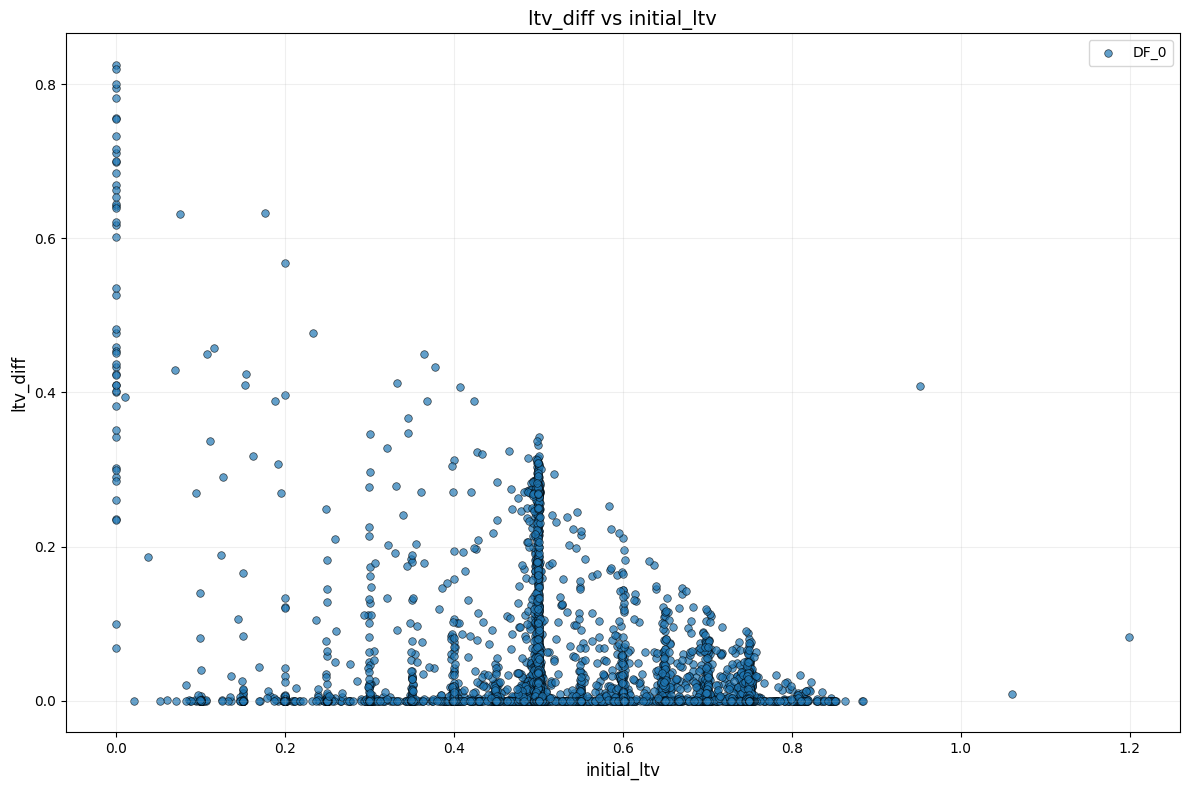

In [476]:
# density_scatter(
#     open_repay_close_chains[open_repay_close_chains["max_debt"] < 100_000],
#     "max_debt",
#     "initial_ltv",
# )
LIM = 2_000
dfs = [
    # open_close_chains[(open_close_chains["ltv_diff"] < 0.05) & (open_close_chains["max_debt"] < LIM)],
    open_borrow_close_chains[(open_borrow_close_chains["ltv_diff"] < 0.05) & (open_borrow_close_chains["max_debt"] < LIM)],
    open_repay_close_chains[(open_repay_close_chains["ltv_diff"] < 0.05) & (open_repay_close_chains["max_debt"] < LIM)],
    borrow_add_collateral_chains[(borrow_add_collateral_chains["ltv_diff"] < 0.05) & (borrow_add_collateral_chains["max_debt"] < LIM)],
]

multi_df_scatter(
    [short_chains],
    "initial_ltv",
    "ltv_diff",
    # labels=[
    #     x["event_chain"].unique() for x in dfs
    # ],
    alpha=0.7,
)

In [481]:
multi_df_scatter_3d_plotly(
    # [short_chains],
    dfs,
    "initial_ltv",
    "ltv_diff",
    "max_debt",
    labels=[
        str(x["event_chain"].unique())[:40] for x in dfs
    ],
)

### Chains cluster

In [489]:
chains_df.head(2)

,user_address,chain_id,event_chain,chain_length,position_length_days,total_events,initial_debt,max_debt,initial_collateral,max_collateral,final_collateral,initial_collateral_value,max_collateral_value,initial_ltv,max_ltv,ltv_diff,avg_debt,avg_ltv,ltv_volatility,first_timestamp,last_timestamp,first_event,last_event,was_liquidated
0,0x0002f95Bc5D92B33e2f70EF99808c57637355484,0x0002f95B_0,position_open → borrow_more_w_collateral → rep...,57,186.558310,57,619.15,3996.103617,0.009020,0.057983,0.000000,858.228869,5447.850000,0.721428,0.805306,0.083878,2402.01573,0.663853,0.171294,1736336843,1752455481,position_open,position_close,0
1,0x00060993C927eE4A3738D916f877c9C92d6F81bD,0x00060993_0,position_open → repay_partial,2,17.853958,2,10000.00,10000.000000,0.167814,0.167814,0.167814,19977.243864,19977.243864,0.500570,0.549965,0.049395,9500.00000,0.497769,0.002801,1754966623,1756509205,position_open,repay_partial,0


In [88]:
from sklearn.preprocessing import StandardScaler

# P(action | prev_actions, user_params, market_params)

# _ _ _  _ _  _ _ x _ _ _ _  _ _  _ _  _ _  _ _

chains = [
    "position_open → position_close",
    "position_open → repay_partial → position_close",
    "position_open → borrow_more_w_collateral → repay_partial → position_close",
    "position_open → collateral_add → position_close",
    "position_open → collateral_add → repay_partial → position_close",
]

FIELDS_FOR_CLUSTER = [
    "position_length_days",
    "max_debt",
    "max_collateral",
    "initial_ltv",
    "ltv_diff",
]
chains_for_cluster_full = leave_valid_chains(
    chains_df,
    prefix="position_open",
    len_lim=10,
    leave_first_k=10,
    contains_event="position_close",
)
# chains_for_cluster = chains_for_cluster[chains_for_cluster["event_chain"].isin(
#     chains
# )]
chains_for_cluster = chains_for_cluster_full[FIELDS_FOR_CLUSTER]
# chains_for_cluster["max_debt"] = np.log1p(chains_for_cluster["max_debt"])

scaler = StandardScaler()
chains_for_cluster_scaled = scaler.fit_transform(chains_for_cluster)
chains_for_cluster_scaled = pd.DataFrame(chains_for_cluster_scaled, columns=chains_for_cluster.columns)

chains_for_cluster.shape, chains_for_cluster.head(2)




((12786, 5),
    position_length_days  max_debt  max_collateral  initial_ltv  ltv_diff
 2            213.666713     200.0        0.004265     0.485447  0.159141
 5             38.527384      43.0        0.000505     0.749831  0.027101)

In [89]:
chains_df.shape, chains_for_cluster_full.shape, chains_for_cluster_full.head(2)

((29217, 25),
 (12786, 25),
                                  user_address      chain_id  \
 2  0x000Aee61aee8aA46422A2f29Ebefc57684A9Ee81  0x000Aee61_0   
 5  0x001D862D3ED16aC91233A26fa537509348Da48E5  0x001D862D_0   
 
                                          event_chain  chain_length  \
 2  position_open → collateral_withdraw → position...             3   
 5                     position_open → position_close             2   
 
    position_length_days  total_events  initial_debt  max_debt  \
 2            213.666713             3         200.0     200.0   
 5             38.527384             2          43.0      43.0   
 
    initial_collateral  max_collateral  final_collateral  \
 2            0.004265        0.004265               0.0   
 5            0.000505        0.000505               0.0   
 
    initial_collateral_value  max_collateral_value  initial_ltv   max_ltv  \
 2                411.991508            411.991508     0.485447  0.644588   
 5                 57.34622

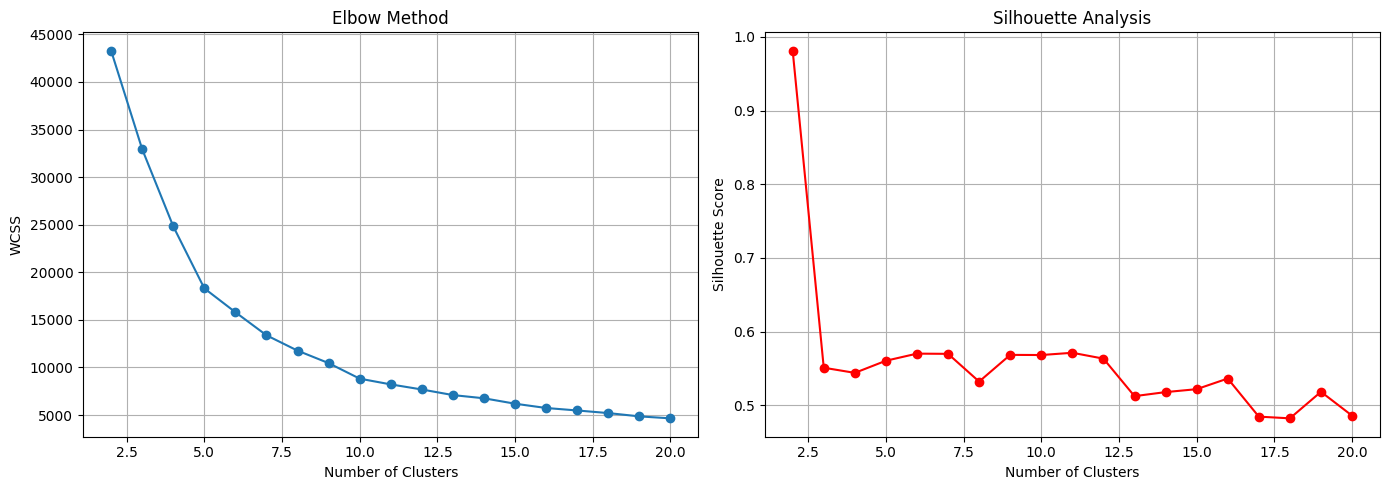

Optimal clusters suggested: 2
Optimal cluster cnt 9
Silhouette Score: 0.568

Cluster sizes:
  Cluster 0: 494 users (3.9%)
  Cluster 1: 740 users (5.8%)
  Cluster 2: 1 users (0.0%)
  Cluster 3: 7244 users (56.7%)
  Cluster 4: 593 users (4.6%)
  Cluster 5: 2120 users (16.6%)
  Cluster 6: 94 users (0.7%)
  Cluster 7: 1497 users (11.7%)
  Cluster 8: 3 users (0.0%)


<Figure size 700x500 with 0 Axes>

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



def find_optimal_clusters(pca_features, max_k=10):
    wcss = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_features)
        wcss.append(kmeans.inertia_)
        
        if len(set(kmeans.labels_)) > 1:
            score = silhouette_score(pca_features, kmeans.labels_)
            silhouette_scores.append(score)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.plot(range(2, max_k + 1), wcss, marker='o')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('WCSS')
    ax1.set_title('Elbow Method')
    ax1.grid(True)
    
    ax2.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='red')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = range(2, max_k + 1)[np.argmax(silhouette_scores)]
    print(f'Optimal clusters suggested: {optimal_k}')
    
    return optimal_k

def perform_clustering(feats, n_clusters=4, vis=False):
    algo = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    # cluster_labels = kmeans.fit_predict(pca_features)
    # algo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = algo.fit_predict(feats)
        
    plt.figure(figsize=(7, 5))
    
    if vis:
        if feats.shape[1] >= 2:
            scatter = plt.scatter(feats.iloc[:, 0], feats.iloc[:, 1], 
                                c=cluster_labels, cmap='tab10', alpha=0.6, s=50)
            # plt.xlabel(feats.columns[0])
            # plt.ylabel(feats.columns[1])
            plt.title(f'K-means Clustering (k={n_clusters}) on PCA Space')
            plt.colorbar(scatter, label='Cluster')
        else:
            plt.hist(cluster_labels, bins=n_clusters, alpha=0.7)
            plt.xlabel('Cluster')
            plt.ylabel('Frequency')
            plt.title(f'Cluster Distribution (k={n_clusters})')
    
        plt.grid(True, alpha=0.3)
        plt.show()
    
    print(f'Silhouette Score: {silhouette_score(feats, cluster_labels):.3f}')
    
    cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
    print('\nCluster sizes:')
    for cluster, size in cluster_sizes.items():
        print(f'  Cluster {cluster}: {size} users ({size/len(cluster_labels):.1%})')
    
    return cluster_labels, algo

optimal_k = find_optimal_clusters(chains_for_cluster_scaled, max_k=20)
optimal_k = 9
print("Optimal cluster cnt", optimal_k)

cluster_labels, kmeans_model = perform_clustering(chains_for_cluster_scaled, n_clusters=optimal_k)

In [ ]:
chains_for_cluster, 

,position_length_days,max_debt,max_collateral,initial_ltv,ltv_diff
2,213.666713,200.000000,0.004265,0.485447,0.159141
5,38.527384,43.000000,0.000505,0.749831,0.027101
8,112.505903,25.000000,0.000524,0.500042,0.000000
9,1.646505,200.000000,0.012238,0.200019,0.000000
10,2.775023,698.947891,0.012287,0.601074,0.000000
...,...,...,...,...,...
29206,8.735671,75.000000,0.001274,0.499706,0.035292
29210,0.150671,2500.000000,0.057611,0.503900,0.000000
29212,32.598796,455.000000,0.008040,0.504749,0.005438
29213,9.719074,1500.000000,0.031630,0.500218,0.000000


In [530]:
# chains_for_cluster.columns
# chains_for_cluster_scaled["max_debt"].describe()
# chains_for_cluster_scaled["cluster"].value_counts()

cluster
0    6577
3    1655
2    1150
4      32
1       2
Name: count, dtype: int64

In [94]:
chains_for_cluster_scaled["cluster"] = cluster_labels
chains_for_cluster["cluster"] = cluster_labels

dfs = [
    chains_for_cluster[chains_for_cluster["cluster"] == i] for i in range(chains_for_cluster_scaled["cluster"].max())
]
multi_df_scatter_3d_plotly(
    dfs,
    "initial_ltv",
    "position_length_days",
    "max_debt",
    labels=[
        f"cluster {i}" for i in range(len(dfs))
    ],
)

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3456/421800762.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
# chains_for_cluster.groupby("cluster").mean()
chains_for_cluster_full["cluster"] = cluster_labels
chains_for_cluster_full["cluster"].value_counts()

cluster
1    7370
6    1829
5    1151
3     474
0     447
4      77
2       1
Name: count, dtype: int64

In [95]:
chains_for_cluster_full[chains_for_cluster_full["cluster"] == 3][[
    # "event_chain",
    "initial_ltv",
    "ltv_diff",
    "max_debt",
    "position_length_days",
]].mean()

chains_for_cluster_full[[
    "initial_ltv",
    "ltv_diff",
    "max_debt",
    "position_length_days",
    "cluster",
]].groupby("cluster").mean()

KeyError: 'cluster'

In [303]:
current_addresses = chains_df[chains_df["event_chain"].str.startswith("position_open → repay_full")]["user_address"].unique()
df_labeled[df_labeled["user_address"] == current_addresses[0]][[
    'hash_short',
    'datetime',
    "event_type",
    "event_sequence_type",
    "type",
    "ltv_after",
    "debt_after",
]].sort_values("datetime")

# df[df["user_address"] == current_addresses[0]][[
#     # 'hash_short',
#     'datetime',
#     "event_type",
#     # "event_sequence_type",
#     "type",
#     "ltv_after",
#     "debt_after",
# ]].sort_values("datetime")



,hash_short,datetime,event_type,event_sequence_type,type,ltv_after,debt_after
20911,0x7681721f,2025-08-19 12:55:11,position_open,position_open,MarketSupplyCollateral,0.593205,29.99658
20912,0x7681721f,2025-08-19 12:55:11,position_open,position_open,MarketBorrow,0.593205,29.99658
20914,0xf4fa48b7,2025-08-19 13:20:47,repay_full,repay_full,MarketRepay,0.000000,0.00000
20917,0x443761cd,2025-08-19 13:32:11,position_close,position_close,MarketWithdrawCollateral,0.000000,0.00000


In [169]:
# user_lending["borrow_volume"].hist()
# user_lending["ltv"].max()
n_quantiles_volume = 10
user_lending['borrow_volume_log'] = np.log1p(user_lending['borrow_volume'])
user_lending['borrow_volume_group'] = pd.qcut(user_lending['borrow_volume'], q=n_quantiles_volume, labels=False, duplicates='drop')
bins = np.array([0, 0.5, 0.6, 0.7, 0.75, 0.8, 0.84, 1])
user_lending['ltv_group'] = np.digitize(user_lending['ltv'], bins)

# user_lending['borrow_volume_log'].hist()
# user_lending["time_to_borrow_seconds"].value_counts()
# user_lending[user_lending["time_to_borrow_seconds"] != 0].sort_values("time_to_borrow_seconds")


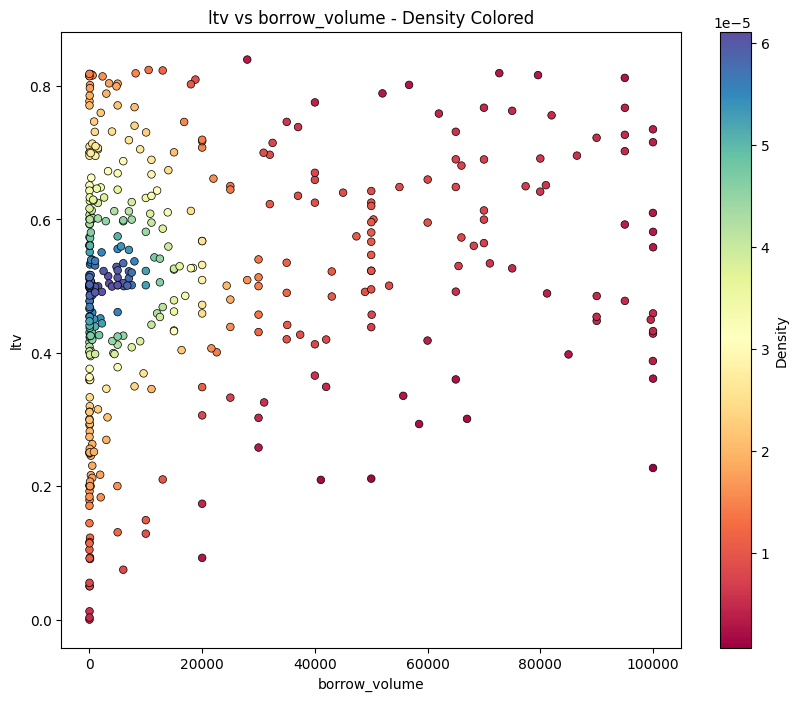

In [172]:
import matplotlib.pyplot as plt
# import seaborn as sns

def scatter_plot(df, x, y, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.scatter(df[x], df[y], alpha=0.6, s=30, edgecolor='black', linewidth=0.5)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(f'{y} vs {x}', fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

def scatter_plot_cluster(df, x, y, cluster_col='cluster', figsize=(10, 8)):
    plt.figure(figsize=figsize)
    
    clusters = df[cluster_col].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
    
    for cluster, color in zip(clusters, colors):
        cluster_data = df[df[cluster_col] == cluster]
        plt.scatter(cluster_data[x], cluster_data[y], alpha=0.6, s=30, 
                   edgecolor='black', linewidth=0.5, color=color, label=f'Cluster {cluster}')
    
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(f'{y} vs {x}', fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()



density_scatter(
    user_lending[user_lending["borrow_volume"] < 100_000],
    # user_lending,
    "borrow_volume",
    "ltv"
)
# density_scatter(
#     user_lending,
#     "borrow_volume_log",
#     "utilization_at_borrow"
# )
# density_scatter(
#     user_lending,
#     "borrow_volume_log",
#     "trend_24h",
# )
# density_scatter(
#     user_lending,
#     "borrow_volume_log",
#     "volatility_24h",
# )
# density_scatter(
#     user_lending,
#     "utilization_at_borrow",
#     "trend_24h",
# )


In [137]:
user_lending["borrow_volume"] .describe()

count    5.420000e+02
mean     2.467490e+05
std      1.267676e+06
min      9.816642e-04
25%      3.471042e+02
50%      1.249788e+04
75%      8.910229e+04
max      2.199575e+07
Name: borrow_volume, dtype: float64

In [138]:
user_lending[user_lending["borrow_volume"] < 1_000].shape, user_lending[user_lending["borrow_volume"] < 10_000].shape, user_lending.shape, df["user_address"].nunique(), \
user_lending[user_lending["borrow_volume"] < 100_000].shape, user_lending.shape, user_lending[(user_lending["borrow_volume"] > 100_000)].shape

((168, 16), (258, 16), (542, 16), 628, (428, 16), (542, 16), (114, 16))

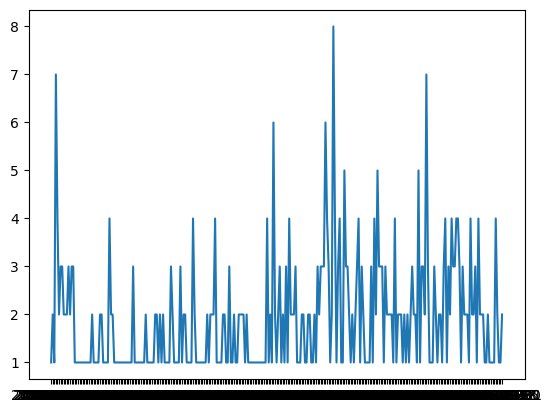

In [139]:
# df.drop_duplicates('timestamp')["trend_24h"].hist()
# user_lending[user_lending["health_factor"] < 4]["health_factor"].hist()
user_lending1 = user_lending.copy()
user_lending1["date"] = user_lending1["datetime"].str[:10]
plt.plot(user_lending1["date"].value_counts().sort_index())
# user_lending1

In [140]:
# !pip3 install --upgrade numpy scipy
from scipy.stats import gaussian_kde

### Users Clusters

In [141]:
df_for_clustering = user_lending[[
    # "borrow_volume_log",
    "borrow_volume",
    "ltv",
    "utilization_at_borrow",
    "volatility_24h",
    "trend_24h",
]]
df_for_clustering["borrow_volume"] = df_for_clustering["borrow_volume"].clip(0, 500000)
df_for_clustering = df_for_clustering[df_for_clustering["borrow_volume"] < 1500].reset_index(drop=True)

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_3184/1098913458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering["borrow_volume"] = df_for_clustering["borrow_volume"].clip(0, 500000)


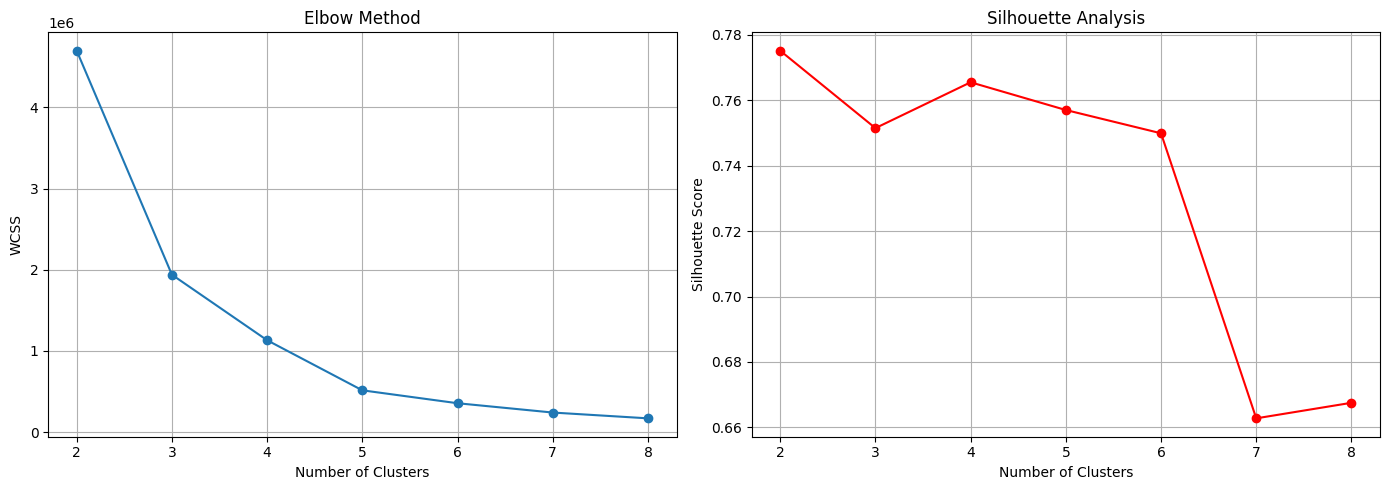

Optimal clusters suggested: 2
Optimal cluster cnt 4


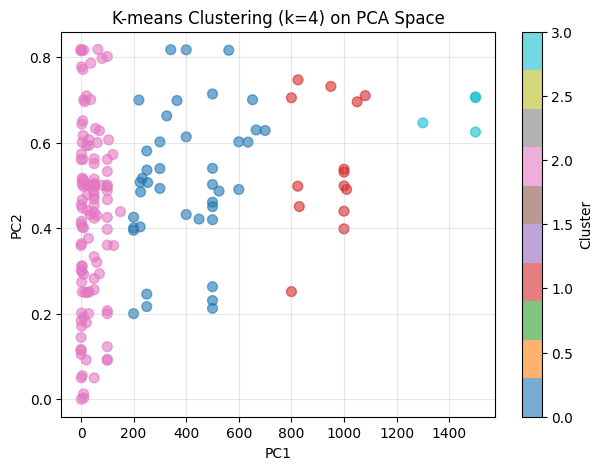

Silhouette Score: 0.740

Cluster sizes:
  Cluster 0: 41 users (23.3%)
  Cluster 1: 14 users (8.0%)
  Cluster 2: 117 users (66.5%)
  Cluster 3: 4 users (2.3%)


In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


def find_optimal_clusters(pca_features, max_k=10):
    wcss = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_features)
        wcss.append(kmeans.inertia_)
        
        if len(set(kmeans.labels_)) > 1:
            score = silhouette_score(pca_features, kmeans.labels_)
            silhouette_scores.append(score)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.plot(range(2, max_k + 1), wcss, marker='o')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('WCSS')
    ax1.set_title('Elbow Method')
    ax1.grid(True)
    
    ax2.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='red')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = range(2, max_k + 1)[np.argmax(silhouette_scores)]
    print(f'Optimal clusters suggested: {optimal_k}')
    
    return optimal_k

def perform_clustering(pca_features, n_clusters=4):
    # algo = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    # cluster_labels = kmeans.fit_predict(pca_features)
    algo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = algo.fit_predict(pca_features)
    
    pca_with_clusters = pca_features.copy()
    pca_with_clusters['Cluster'] = cluster_labels
    
    
    plt.figure(figsize=(7, 5))
    
    if pca_features.shape[1] >= 2:
        scatter = plt.scatter(pca_features.iloc[:, 0], pca_features.iloc[:, 1], 
                            c=cluster_labels, cmap='tab10', alpha=0.6, s=50)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title(f'K-means Clustering (k={n_clusters}) on PCA Space')
        plt.colorbar(scatter, label='Cluster')
    else:
        plt.hist(cluster_labels, bins=n_clusters, alpha=0.7)
        plt.xlabel('Cluster')
        plt.ylabel('Frequency')
        plt.title(f'Cluster Distribution (k={n_clusters})')
    
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f'Silhouette Score: {silhouette_score(pca_features, cluster_labels):.3f}')
    
    cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
    print('\nCluster sizes:')
    for cluster, size in cluster_sizes.items():
        print(f'  Cluster {cluster}: {size} users ({size/len(cluster_labels):.1%})')
    
    return cluster_labels, algo

optimal_k = find_optimal_clusters(df_for_clustering, max_k=8)
optimal_k = 4
print("Optimal cluster cnt", optimal_k)

# Perform clustering
PCA_CUTOFF = 2
cluster_labels, kmeans_model = perform_clustering(df_for_clustering, n_clusters=optimal_k)

# Add clusters back to original data
prepared_df = user_lending.copy()

df_for_clustering['cluster'] = cluster_labels

# Analyze cluster characteristics
# cluster_profiles = prepared_df.drop(columns=["user_address"]).groupby('cluster').mean()
# cluster_profiles


In [143]:
prepared_df["cluster"].value_counts()
prepared_df.head(3)

KeyError: 'cluster'

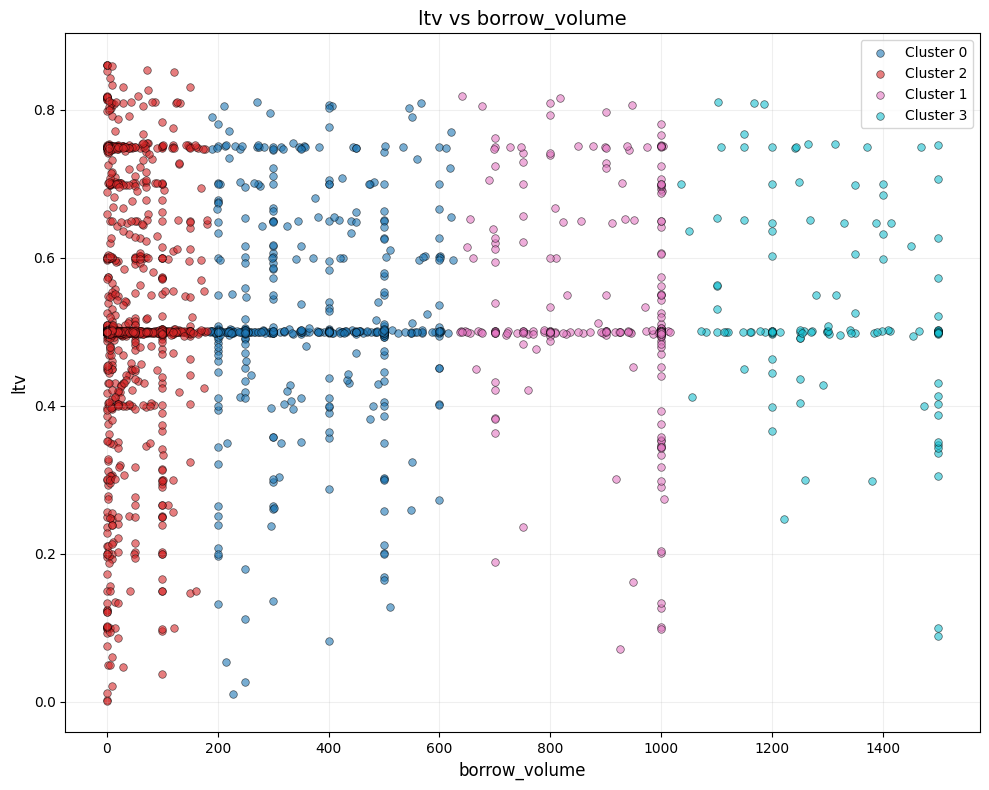

In [ ]:
scatter_plot_cluster(
    df_for_clustering,
    "borrow_volume",
    "ltv"
)


## Manual clustering

In [145]:
# manual_cluster
def assign_cluster(row):
    if row["borrow_volume"] < 10_000:
        if 0.5 < row["ltv"] < 0.72:
            return "volume_low_risk_medium"
        if row["ltv"] <= 0.5:
            return "volume_low_risk_low"
        if row["ltv"] >= 0.72:
            return "volume_low_risk_high"
    if row["borrow_volume"] < 100_000:
        if row["ltv"] < 0.73:
            return "volume_medium_risk_medium"
        if row["ltv"] >= 0.73:
            return "volume_medium_risk_high"
    if row["borrow_volume"] > 100_000:
        if row["ltv"] < 0.73:
            return "volume_medium_risk_medium"
        if row["ltv"] >= 0.73:
            return "volume_medium_risk_high"
    
    
user_lending["manual_cluster"] = user_lending.apply(assign_cluster, axis=1)
user_lending["manual_cluster"].value_counts()

manual_cluster
volume_medium_risk_medium    247
volume_low_risk_low          126
volume_low_risk_medium       106
volume_medium_risk_high       37
volume_low_risk_high          26
Name: count, dtype: int64

<Axes: >

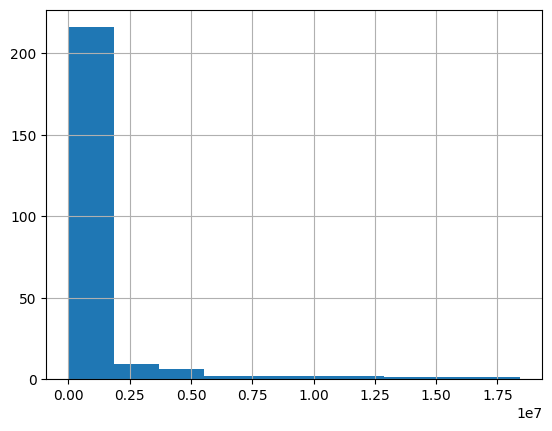

In [163]:
cluster_name = "volume_medium_risk_medium"
cluster_addresses = user_lending[user_lending["manual_cluster"] == cluster_name]["user_address"].unique()
cluster_actions = df[df["user_address"].isin(cluster_addresses)]
cluster_actions.shape
address_to_max_debt = cluster_actions.groupby("user_address")["debt_after"].max().reset_index().rename(columns={"debt_after": "max_debt"})
# cluster_actions
address_to_max_debt[address_to_max_debt["max_debt"] < 20_000_000]["max_debt"].hist()


In [ ]:
# p1 = pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_raw/base_cbbtc_usdc_1.csv")
# p2 = pd.read_csv("/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_raw/base_cbbtc_usdc.csv")
# pd.concat([p1,p2], ignore_index=True).sort_values("timestamp").to_csv(
#     "/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_raw/base_cbbtc_usdc_full.csv", index=False
# )
